Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [93]:
#Imoporting neccecory Libraries:

#common lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#preprocessing lib:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

#outliers lib:
from scipy import stats

#multicolliniarity lib:
from sklearn.feature_selection import SelectKBest,f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score

#Model building lib 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC

#model evaluation lib:
from sklearn.metrics import classification_report,roc_auc_score,accuracy_score,confusion_matrix,plot_roc_curve

#model hyper parameter tuning lib:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [43]:
#importing the Dataframe
df=pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#display all the rows from the dataframe
pd.set_option('display.max_rows',None)

In [4]:
df.shape
#there is 7043 rows and 21 columns is availble in the data

(7043, 21)

In [5]:
df.info()
#the dataframe having the object,int and float datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#checking null value from the dataframe
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

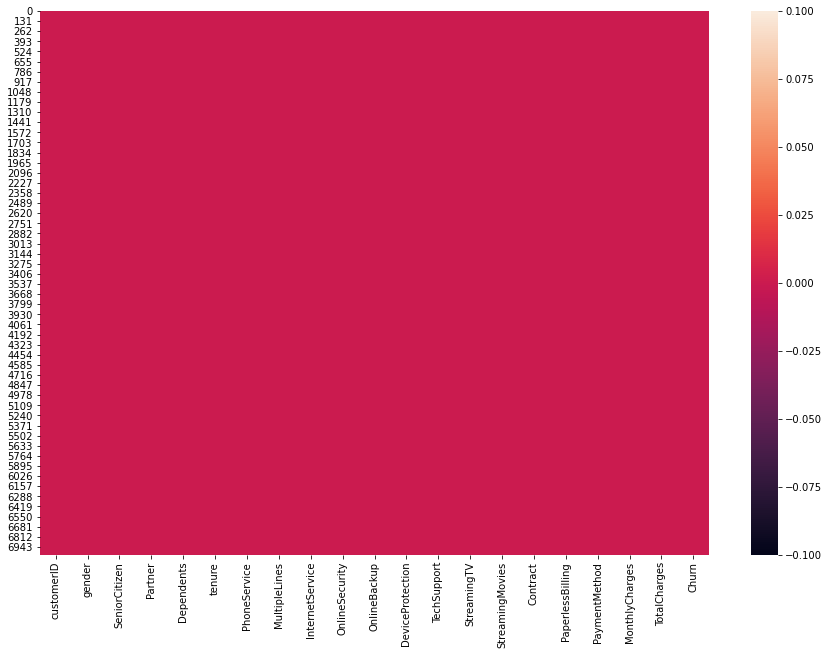

In [7]:
#there is no null value available in the dataframe.cross checking the same with the heatmap.
plt.figure(figsize=(15,10))
sns.heatmap(df.isna())
plt.show()

In [50]:
#df['TotalCharges'] = df['TotalCharges'].astype(np.float)

In [49]:
#df['TotalCharges']=df['TotalCharges'].replace('_',df['TotalCharges'].mean())
#df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [53]:
#checking the mean of TotalCharges
#df['TotalCharges'].mean()

In [55]:
#TotalCharges is shown object but is float so trying to check and repalce null with mean
df['TotalCharges']=df['TotalCharges'].replace([' '],'1395.05')

In [56]:
#conerting the df['TotalCharges'] into numneric
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])
df['TotalCharges'].dtype

dtype('float64')

In [57]:
#describe the dataframe
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.913141
std,0.368612,24.559481,30.090047,2265.271879
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1395.050000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
#here only 3 features with the continious data.
#the values of mean and median(50%) is not looks equal so there is outliers are available in the features.
#the standerd daviation is also looks normal.

In [58]:
#not useful:customerID
#get_dummies:MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [59]:
#dropping the custmer ID from the dataframe as its not looks useful
df=df.drop(columns=['customerID'],axis=1)

In [61]:
#encodiing the catagerical into the numerical formet
lb=LabelEncoder()
var_val=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']

for i in var_val:
    df[i]=lb.fit_transform(df[i])

In [62]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [63]:
#encoding the value into binary formet using get dummies
df=pd.get_dummies(df,columns=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod'])

In [64]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_0,StreamingMovies_1,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


In [65]:
#checking the new shape of the columns
df.shape
#then new shape is 7043 rows and 41 columns

(7043, 41)

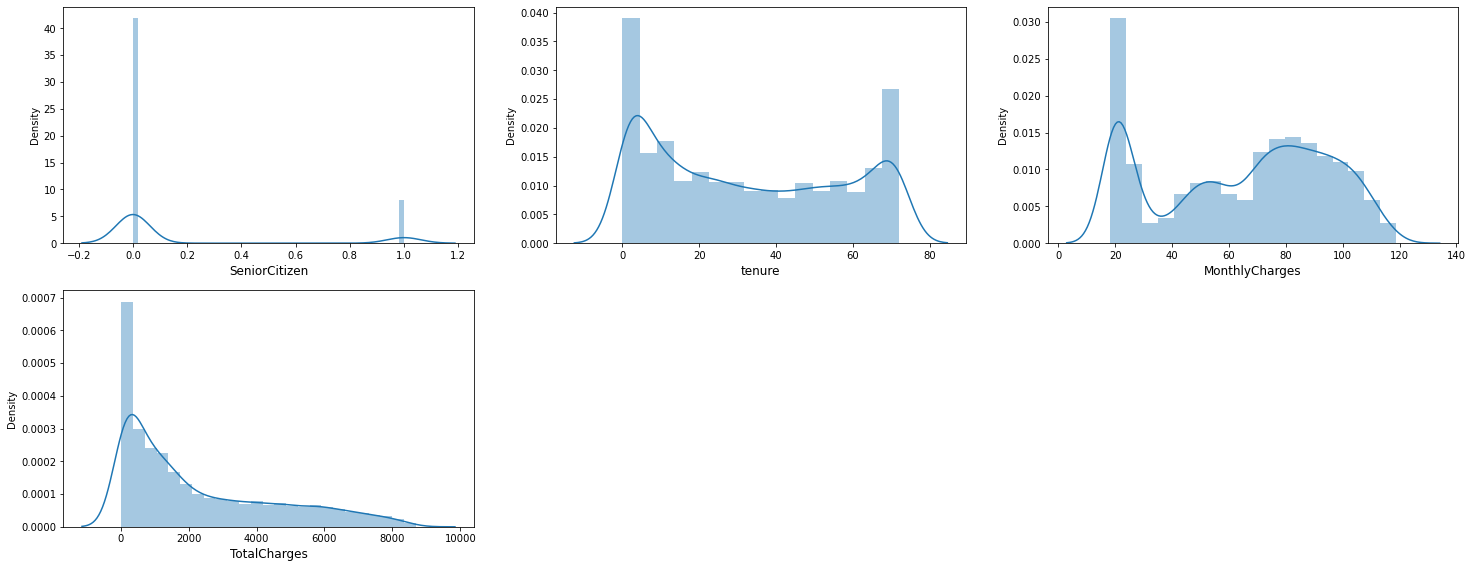

In [66]:
#checking the data distrubution using the distribution plot.
plt.figure(figsize=(25,20),facecolor='white')
pltnum=1

for column in df.iloc[:,[1,4,7,8]]:
    if pltnum <= 12:
        plt.subplot(4,3,pltnum)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=12)
        
    pltnum +=1
plt.show()    

In [ ]:
#the data distributions looks normal for the selected features.
#there is very less outliers looks in the countinious features.checking the same with the boxplot

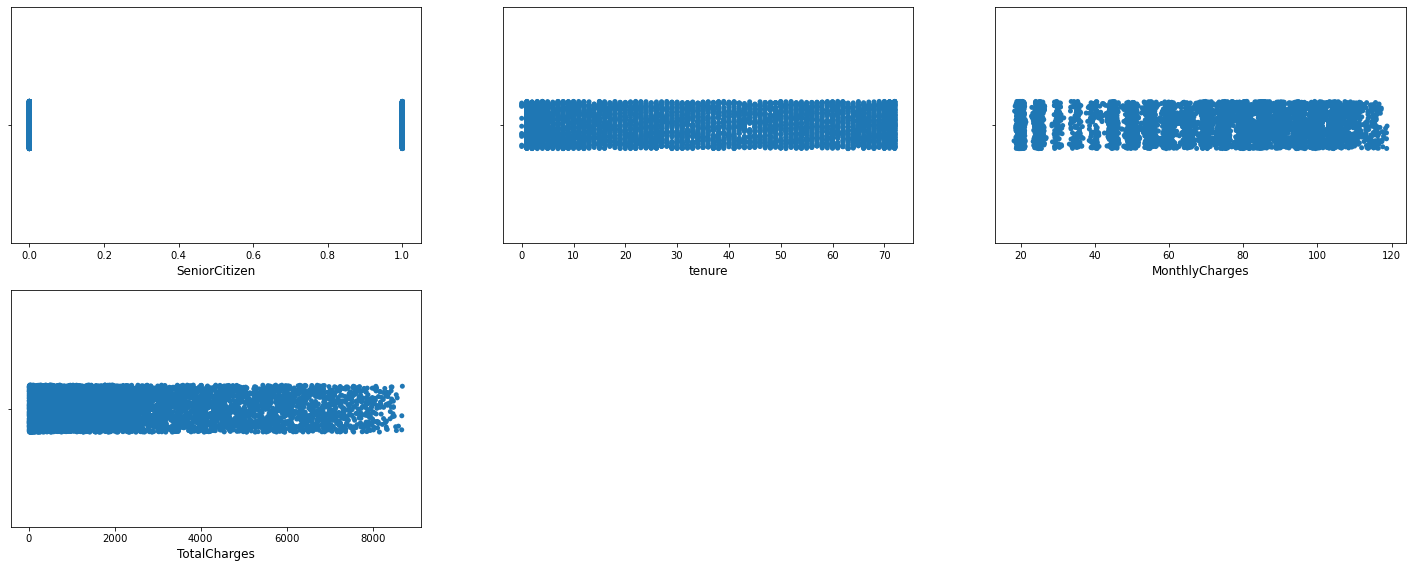

In [67]:
#checking the data distrubution using the Strip plot.
plt.figure(figsize=(25,20),facecolor='white')
pltnum=1

for column in df.iloc[:,[1,4,7,8]]:
    if pltnum <= 12:
        plt.subplot(4,3,pltnum)
        sns.stripplot(df[column])
        plt.xlabel(column,fontsize=12)
        
    pltnum +=1
plt.show()    

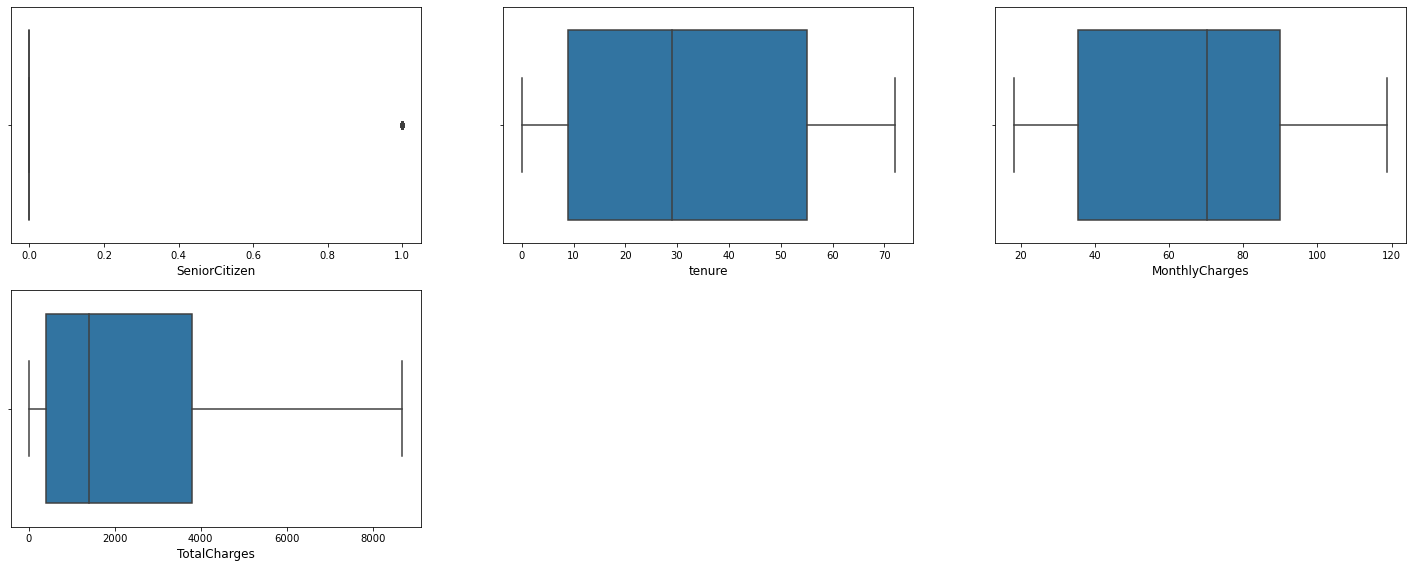

In [68]:
#using box plot to check the outliers in the feature.
plt.figure(figsize=(25,20),facecolor='white')
pltnum=1

for column in df.iloc[:,[1,4,7,8]]:
    if pltnum <= 12:
        plt.subplot(4,3,pltnum)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=12)
        
    pltnum +=1
plt.show()    

In [ ]:
#There is no outliers are present in the selected continious features.there is no need to perfrom outliers activity.

In [69]:
#checking the skewness and correlation between the featues and labels
df_corr=df.iloc[:,[1,4,7,8,9]].corr()
df_corr['Churn'].sort_values(ascending=False)

Churn             1.000000
MonthlyCharges    0.193356
SeniorCitizen     0.150889
TotalCharges     -0.199036
tenure           -0.352229
Name: Churn, dtype: float64

In [ ]:
#there is no skewness and correlation between the featues and labels.

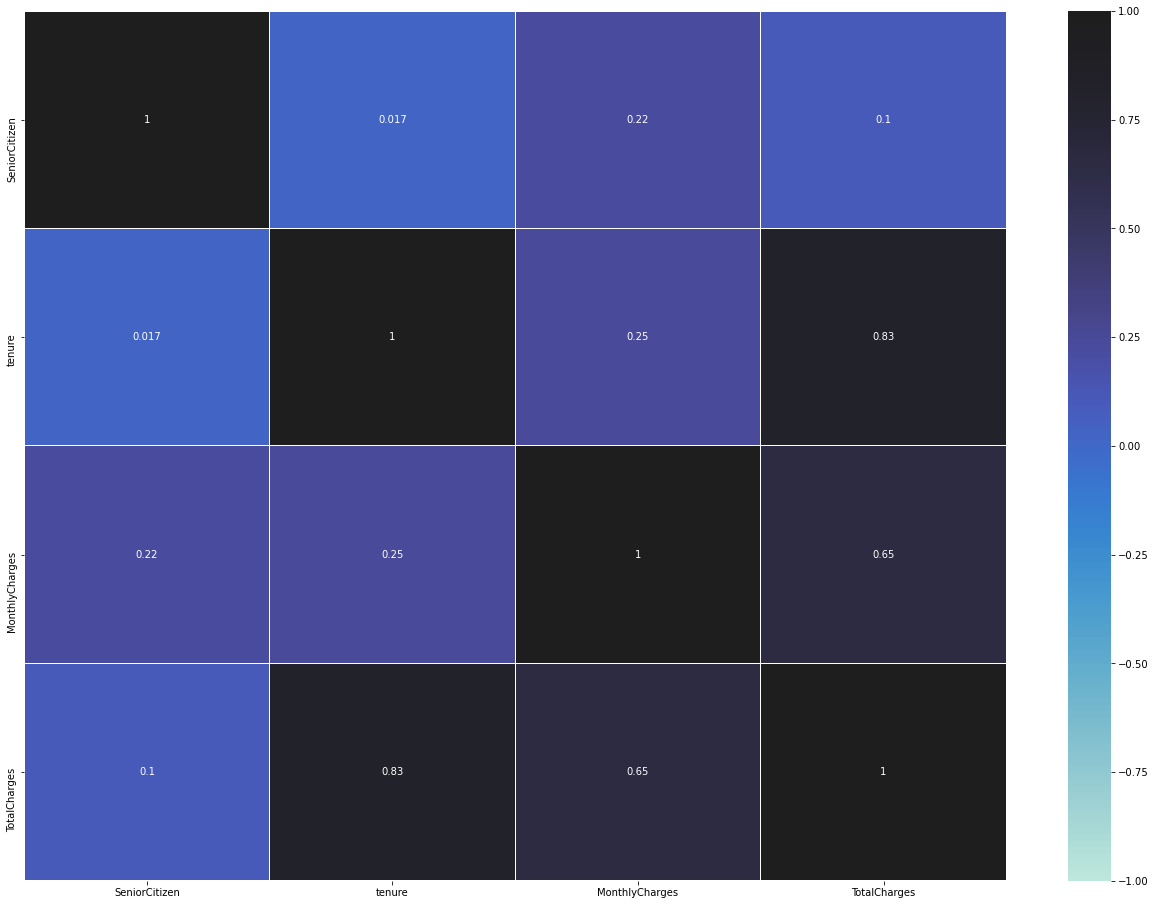

In [71]:
#using the heatmap to check the multicolliniarity between features.
corr_matrix=df.iloc[:,[1,4,7,8]].abs().corr()

plt.figure(figsize=(22,16))

sns.heatmap(corr_matrix,vmin=-1,vmax=1,center=True,annot=True, fmt='.2g',linewidths=0.1)
plt.show()

#as we can see in heatmap there is no correlation between the features and labels

In [ ]:
#there is correlction looks between the tenure and TotalCharges.
#cross check the same with the VIF.

In [72]:
data_var=['MonthlyCharges','SeniorCitizen','TotalCharges','tenure']
features=df[data_var]

In [73]:
#using the standerd scalar for scaling the data
scalar=StandardScaler()
x_data=scalar.fit_transform(features.values)

In [74]:
#assigning the  scaled data to features
df[['MonthlyCharges','SeniorCitizen','TotalCharges','tenure']]=x_data

In [75]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_0,StreamingMovies_1,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,0,-0.439916,1,0,-1.277445,0,1,-1.160323,-0.994240,0,...,1,0,0,1,0,0,0,0,1,0
1,1,-0.439916,0,0,0.066327,1,0,-0.259629,-0.173242,0,...,1,0,0,0,1,0,0,0,0,1
2,1,-0.439916,0,0,-1.236724,1,1,-0.362660,-0.959672,1,...,1,0,0,1,0,0,0,0,0,1
3,1,-0.439916,0,0,0.514251,0,0,-0.746535,-0.194764,0,...,1,0,0,0,1,0,1,0,0,0
4,0,-0.439916,0,0,-1.236724,1,1,0.197365,-0.940467,1,...,1,0,0,1,0,0,0,0,1,0


In [76]:
df1=df.iloc[:,[1,4,7,8]]
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.439916,-1.277445,-1.160323,-0.994240
1,-0.439916,0.066327,-0.259629,-0.173242
2,-0.439916,-1.236724,-0.362660,-0.959672
3,-0.439916,0.514251,-0.746535,-0.194764
4,-0.439916,-1.236724,0.197365,-0.940467


In [77]:
#checking feature colliniarity using VIF
vif=pd.DataFrame()
vif['features']=df1.columns
vif['vif score']=[variance_inflation_factor(x_data,i) for i in range(x_data.shape[1])]
vif

,features,vif score
0,SeniorCitizen,3.278849
1,tenure,1.054622
2,MonthlyCharges,9.412152
3,TotalCharges,5.772062


In [ ]:
#as we can see there is multicolliniarty between the MonthlyCharges and TotalCharges features as both having vif score grater then 5.

In [78]:
#dropping the feature MonthlyCharges having the high vif.
df=df.drop(columns='MonthlyCharges',axis=1)

In [79]:
data_var=['SeniorCitizen','TotalCharges','tenure']
features=df[data_var]

In [80]:
#using the standerd scalar for scaling the data
scalar=StandardScaler()
x_data=scalar.fit_transform(features.values)

In [81]:
#assigning the  scaled data to features
df[['SeniorCitizen','TotalCharges','tenure']]=x_data

In [83]:
df1=df.iloc[:,[1,4,7]]
df1.head()

,SeniorCitizen,tenure,TotalCharges
0,-0.439916,-1.277445,-0.994240
1,-0.439916,0.066327,-0.173242
2,-0.439916,-1.236724,-0.959672
3,-0.439916,0.514251,-0.194764
4,-0.439916,-1.236724,-0.940467


In [84]:
#checking feature colliniarity using VIF
vif=pd.DataFrame()
vif['features']=df1.columns
vif['vif score']=[variance_inflation_factor(x_data,i) for i in range(x_data.shape[1])]
vif

,features,vif score
0,SeniorCitizen,1.025770
1,tenure,3.218671
2,TotalCharges,3.185629


In [ ]:
#the features multicolliniarity issue has been solved as score is below than 5.

In [85]:
#now sepraating the independent features and target
x=df.drop(columns='Churn',axis=1)
y=df['Churn']

In [86]:
#checking the target imbalanced issue.
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

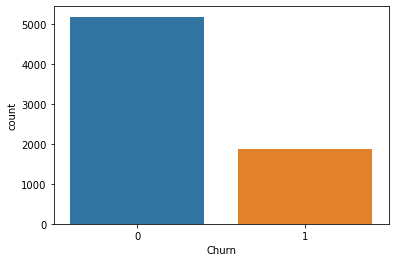

In [87]:
#the is target imbalanced problem present in the df.
sns.countplot(x='Churn',data=df)

In [ ]:
#as we clearly see from the countplot also target imbalanced problem is present in the target set.
#using the upsampling technique to resolve the issue.

In [88]:
#importing the SMOTE from imblearn to perfrom the over sampling
from imblearn.over_sampling import SMOTE

In [89]:
#using the SMOTE to solve the imbalanced problem
SM=SMOTE()
x_fit,y_fit=SM.fit_resample(x,y)

In [90]:
#new the issue of class imbalanced problem has been solved.
y_fit.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

In [94]:
#Finding best Random State:
maxAcc=0
maxRs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_fit,y_fit,test_size=0.25,random_state=i)
    dt=LogisticRegression()
    dt.fit(x_train,y_train)
    y_pred=dt.predict(x_test)
    acc_s=accuracy_score(y_test,y_pred)
    if acc_s > maxAcc:
        maxAcc=acc_s
        maxRs=i
        
print(f"Best Accuracy is : {maxAcc* 100:.2f}%")
print("The Best Random State is :",maxRs)

Best Accuracy is : 84.81%
The Best Random State is : 132


In [95]:
#seprating the train and test datasets with the best find random state
x_train,x_test,y_train,y_test=train_test_split(x_fit,y_fit,test_size=0.25,random_state=132)

In [96]:
#Using the DecisionTreeClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_predlr=lr.predict(x_test)

print('\n==========Outputs of Logistics Reggression===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predlr)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predlr,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predlr))


==========Outputs of Logistics Reggression===========

==========Accuracy Score===========
Accuracy Score is : 84.81%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1302
           1       0.84      0.86      0.85      1285

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587
 

=========Confusion Matrix============
[[1084  218]
 [ 175 1110]]


In [97]:
#Using the DecisionTreeClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_preddt=dt.predict(x_test)

print('\n==========Outputs of DT===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_preddt)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_preddt,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_preddt))


==========Outputs of DT===========

==========Accuracy Score===========
Accuracy Score is : 78.59%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.78      0.79      0.79      1302
           1       0.79      0.78      0.78      1285

    accuracy                           0.79      2587
   macro avg       0.79      0.79      0.79      2587
weighted avg       0.79      0.79      0.79      2587
 

=========Confusion Matrix============
[[1034  268]
 [ 286  999]]


In [98]:
#Using the AdaBoostClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
y_predabc=abc.predict(x_test)

print('\n==========Outputs of ADA Boost===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predabc)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predabc,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predabc))


==========Outputs of ADA Boost===========

==========Accuracy Score===========
Accuracy Score is : 81.68%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1302
           1       0.80      0.85      0.82      1285

    accuracy                           0.82      2587
   macro avg       0.82      0.82      0.82      2587
weighted avg       0.82      0.82      0.82      2587
 

=========Confusion Matrix============
[[1026  276]
 [ 198 1087]]


In [99]:
#Using the RandomForestClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_predrfc=rfc.predict(x_test)

print('\n==========Outputs of Random Forest Classifier===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predrfc)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predrfc,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predrfc))


==========Outputs of Random Forest Classifier===========

==========Accuracy Score===========
Accuracy Score is : 85.20%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1302
           1       0.84      0.86      0.85      1285

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587
 

=========Confusion Matrix============
[[1098  204]
 [ 179 1106]]


In [100]:
#Using the KNeighborsClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_predknn=knn.predict(x_test)

print('\n==========Outputs of KNeighborsClassifier===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predknn)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predknn,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predknn))


==========Outputs of KNeighborsClassifier===========

==========Accuracy Score===========
Accuracy Score is : 82.06%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1302
           1       0.78      0.89      0.83      1285

    accuracy                           0.82      2587
   macro avg       0.83      0.82      0.82      2587
weighted avg       0.83      0.82      0.82      2587
 

=========Confusion Matrix============
[[ 975  327]
 [ 137 1148]]


In [101]:
#Using the SVC algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:

#svc=SVC(probability=True)
svc=SVC()
svc.fit(x_train,y_train)
y_predsvc=svc.predict(x_test)

print('\n==========Outputs of SVC===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predsvc)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predsvc,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predsvc))


==========Outputs of SVC===========

==========Accuracy Score===========
Accuracy Score is : 83.96%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1302
           1       0.83      0.85      0.84      1285

    accuracy                           0.84      2587
   macro avg       0.84      0.84      0.84      2587
weighted avg       0.84      0.84      0.84      2587
 

=========Confusion Matrix============
[[1086  216]
 [ 199 1086]]


In [102]:
print('\n==========Cross Validation Score of Logistices Classifier===========')
cvs_lr=cross_val_score(lr,x_fit,y_fit,cv=5)
print(f"Cross validation for the Logistices Classifier is: {cvs_lr.mean()*100:.2f}%\n")

print('\n==========Cross Validation Score of Random Forest Classifier===========')
cvs_rfc=cross_val_score(rfc,x_fit,y_fit,cv=5)
print(f"Cross validation for the Random Forest Classifier is: {cvs_rfc.mean()*100:.2f}%\n")

print('\n=============Cross Validation Score of Decision Tree====================')
cvs_dt=cross_val_score(dt,x_fit,y_fit,cv=5)
print(f"Cross validation for the Decision Tree is: {cvs_dt.mean()*100:.2f}%\n")

print('\n=============Cross Validation Score of AdaBoost Classifier==============')
cvs_abc=cross_val_score(abc,x_fit,y_fit,cv=5)
print(f"Cross validation for the AdaBoost Classifier is: {cvs_abc.mean()*100:.2f}%\n")

print('\n===================Cross Validation Score of KNN========================')
cvs_knn=cross_val_score(knn,x_fit,y_fit,cv=5)
print(f"Cross validation for the KNN Classifier is: {cvs_knn.mean()*100:.2f}%\n")

print('\n===================Cross Validation Score of SVC========================')
cvs_svc=cross_val_score(svc,x_fit,y_fit,cv=5)
print(f"Cross validation for the SVC Classifier is: {cvs_svc.mean()*100:.2f}%\n")


==========Cross Validation Score of Logistices Classifier===========
Cross validation for the Logistices Classifier is: 82.41%


==========Cross Validation Score of Random Forest Classifier===========
Cross validation for the Random Forest Classifier is: 84.36%


=============Cross Validation Score of Decision Tree====================
Cross validation for the Decision Tree is: 78.77%


=============Cross Validation Score of AdaBoost Classifier==============
Cross validation for the AdaBoost Classifier is: 79.62%


===================Cross Validation Score of KNN========================
Cross validation for the KNN Classifier is: 82.56%


===================Cross Validation Score of SVC========================
Cross validation for the SVC Classifier is: 81.99%



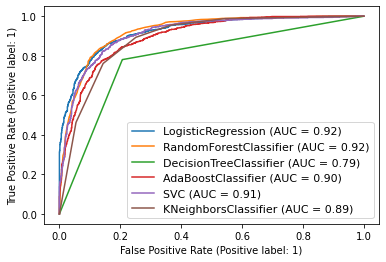

In [103]:
#Using the roc_auc_plot to the same.
dist=plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(rfc,x_test,y_test,ax=dist.ax_)#abc svc, 
plot_roc_curve(dt,x_test,y_test,ax=dist.ax_)
plot_roc_curve(abc,x_test,y_test,ax=dist.ax_)
plot_roc_curve(svc,x_test,y_test,ax=dist.ax_)
plot_roc_curve(knn,x_test,y_test,ax=dist.ax_)

plt.legend(prop={'size':11},loc='lower right')
plt.show()

In [ ]:
#we select the Random Forest Regressor after comaparing all the models accuracy with the cross validation score.
#LR: Accuracy:84.81   cross validation score:82.41  Diffrence:2.9
#DT: Accuracy:78.59   cross validation score:78.77  Diffrence:-0.18
#ADA: Accuracy:81.68   cross validation score:79.62  Diffrence:2.06
#RFC: Accuracy:85.20   cross validation score:84.36  Diffrence:0.84
#KNN: Accuracy:82.06   cross validation score:82.56  Diffrence:-0.5
#SVC: Accuracy:83.96   cross validation score:81.99  Diffrence:1.97

#As we can see the Random forest classifier has least differnece and highet accuracy so we can select it for hyper parameter tuing.

In [113]:
#Now Appling the gridsearchcv beofore building the model to check the best parameter.
best_param={'n_estimators':[80,90,100],
           'criterion':['gini','entropy'],
           'max_depth':[10,12,15],
           'min_samples_split':[2,3,5],
           'min_samples_leaf':[2,4,6]}

In [114]:
gridcv=GridSearchCV(rfc,param_grid=best_param)

In [115]:
gridcv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 15],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [80, 90, 100]})

In [116]:
gridcv.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 80}

In [125]:
#Using the RandomForestClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:

rfc=RandomForestClassifier(criterion='entropy',max_depth=20,min_samples_leaf=2,min_samples_split=3,n_estimators=100)
rfc.fit(x_train,y_train)
y_predrfc=rfc.predict(x_test)

print('\n==========Outputs of Random Forest Classifier===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predrfc)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predrfc,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predrfc))


==========Outputs of Random Forest Classifier===========

==========Accuracy Score===========
Accuracy Score is : 84.54%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1302
           1       0.83      0.87      0.85      1285

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587
 

=========Confusion Matrix============
[[1069  233]
 [ 167 1118]]


In [ ]:
#with the hyper paramneter tuning there is very less inceass in the accuracy.so we are saving the model.

In [126]:
import joblib
joblib.dump(rfc,'Customer_Churn_Model.pkl')

['Customer_Churn_Model.pkl']

In [ ]:
#this complete our model building.